In [200]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode, entropy
from scipy.linalg import svd


In [201]:
data_directory = '/Users/lamahasbini/Library/CloudStorage/OneDrive-AmericanUniversityofBeirut/FYP 2024-25 ECE/FYP_Fall_2024-2025/ML Implementation/EDA Analysis Input Files'
combined_df = pd.DataFrame()

for file in os.listdir(data_directory):
    if file.endswith('.xlsx'):
        file_path = os.path.join(data_directory, file)
        temp = pd.read_excel(file_path, sheet_name='Sheet3')
        parts = file.replace('.xlsx', '').split('_')
        if len(parts) >= 3 and parts[-1] == "new":
            patient_id = f"{parts[-3]}_{parts[-2]}"
        else:
            patient_id = f"{parts[-2]}_{parts[-1]}"
        
        temp['Patient_ID'] = patient_id  
        combined_df = pd.concat([combined_df, temp], ignore_index=True)

In [202]:
print(combined_df.head())  
print(f"Total records combined: {len(combined_df)}")

   Onset_EEG Sleep_stage            Date_EEG  EDR_count      Date_E4_synced  \
0   26759.25           1 2017-07-14 22:47:39          0 2017-07-14 22:46:10   
1   26788.25           W 2017-07-14 22:48:08          0 2017-07-14 22:46:39   
2   26818.25           W 2017-07-14 22:48:38          0 2017-07-14 22:47:09   
3   26848.25           W 2017-07-14 22:49:08          0 2017-07-14 22:47:39   
4   26878.25           W 2017-07-14 22:49:38          0 2017-07-14 22:48:09   

   Storm_mark  Epoch duration  Epoch duration (rounded)  \
0           0       29.000004                      29.0   
1           0       29.999998                      30.0   
2           0       29.999998                      30.0   
3           0       29.999998                      30.0   
4           0       29.000004                      29.0   

   Average EDA per epoch Patient_ID  
0               0.114790     P31_LW  
1               0.109703     P31_LW  
2               0.106686     P31_LW  
3               0.

In [203]:
combined_df.isnull().sum()

Onset_EEG                     0
Sleep_stage                   0
Date_EEG                      0
EDR_count                     0
Date_E4_synced                0
Storm_mark                    0
Epoch duration               49
Epoch duration (rounded)     49
Average EDA per epoch       423
Patient_ID                    0
dtype: int64

In [204]:
combined_df = combined_df.dropna()

In [205]:
X = combined_df.drop(['Sleep_stage', 'Onset_EEG', 'Date_EEG', 'Patient_ID'], axis=1)
X['Date_E4_synced_hour'] = X['Date_E4_synced'].dt.hour
X = X.drop(['Date_E4_synced'], axis=1)
print(X)

y = combined_df['Sleep_stage']
y = y.astype(str)
y = y.replace('3', '2')
y = y.replace('r', 'R')

       EDR_count  Storm_mark  Epoch duration  Epoch duration (rounded)  \
0              0           0       29.000004                      29.0   
1              0           0       29.999998                      30.0   
2              0           0       29.999998                      30.0   
3              0           0       29.999998                      30.0   
4              0           0       29.000004                      29.0   
...          ...         ...             ...                       ...   
46122          0           0       29.000004                      29.0   
46123          0           0       29.999998                      30.0   
46124          0           0       29.999998                      30.0   
46125          0           0       29.999998                      30.0   
46126          0           0       29.000004                      29.0   

       Average EDA per epoch  Date_E4_synced_hour  
0                   0.114790                   22  
1      

In [206]:
X.isnull().sum()

EDR_count                   0
Storm_mark                  0
Epoch duration              0
Epoch duration (rounded)    0
Average EDA per epoch       0
Date_E4_synced_hour         0
dtype: int64

In [207]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.59      0.59      5045
           2       0.52      0.50      0.51      5034
           R       0.58      0.59      0.58      4960
           W       0.56      0.58      0.57      4912

    accuracy                           0.56     19951
   macro avg       0.56      0.56      0.56     19951
weighted avg       0.56      0.56      0.56     19951



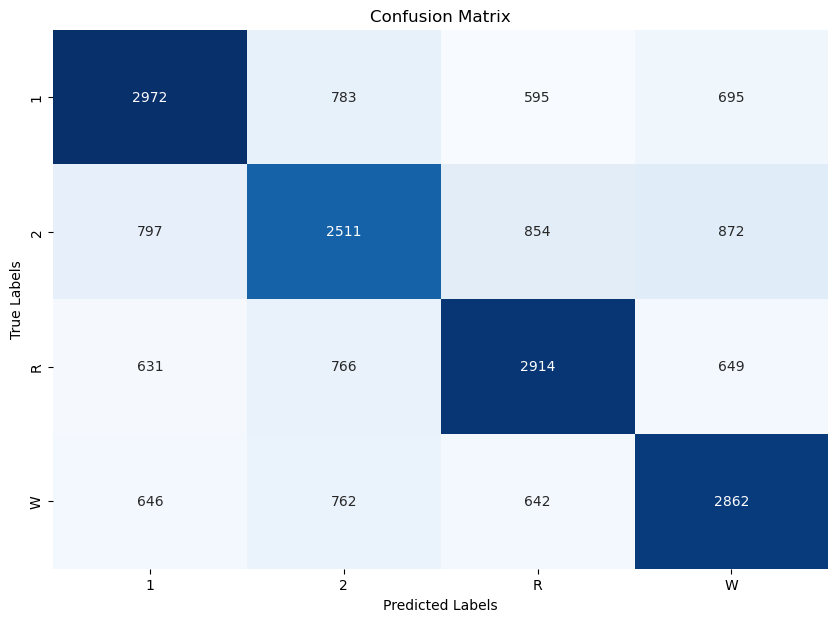

In [210]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Set the size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['1', '2', 'R', 'W'],  
            yticklabels=['1', '2', 'R', 'W'],
            cbar=False)  # Disable color bar

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cleaned_eda_folder = "/Users/lamahasbini/Library/CloudStorage/OneDrive-AmericanUniversityofBeirut/FYP 2024-25 ECE/FYP_Fall_2024-2025/ML Implementation/Cleaned EDA input files"
output_folder = '/Users/lamahasbini/Library/CloudStorage/OneDrive-AmericanUniversityofBeirut/FYP 2024-25 ECE/FYP_Fall_2024-2025/ML Implementation/RF_first_try/features'

os.makedirs(output_folder, exist_ok=True)

def extract_features(signal):
    if len(signal) == 0:
        return {key: np.nan for key in ["Mode", "Median", "MaxAbs", "LineLength", "10thQuantile", "75thQuantile", "NonLinearEnergy", "SVD_Entropy", "ShannonEntropy"]}

    mode_result = mode(signal, nan_policy='omit')

    # Ensure mode_result.mode is iterable
    mode_value = mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) and mode_result.mode.size > 0 else np.nan

    features = {
        "Mode": mode_value,
        "Median": np.median(signal),
        "MaxAbs": np.max(np.abs(signal)),
        "LineLength": np.sum(np.abs(np.diff(signal))),
        "10thQuantile": np.quantile(signal, 0.10),
        "75thQuantile": np.quantile(signal, 0.75),
        "NonLinearEnergy": np.sum(signal[:-2] * signal[1:-1] - signal[2:] ** 2) if len(signal) > 2 else np.nan,
    }

    # Singular Value Decomposition (SVD) Entropy
    if len(signal) > 1:
        U, S, V = np.linalg.svd(np.reshape(signal, (-1, 1)), full_matrices=False)
        S_norm = S / np.sum(S)
        features["SVD_Entropy"] = -np.sum(S_norm * np.log2(S_norm + 1e-10))
    else:
        features["SVD_Entropy"] = np.nan

    # Shannon Entropy
    hist, _ = np.histogram(signal, bins=10, density=True)
    features["ShannonEntropy"] = entropy(hist, base=2)

    return features

# Process all patients
for file in os.listdir(data_directory):
    if file.startswith("EDA_Analysis_") and file.endswith(".xlsx"):
        patient_id = file.replace("EDA_Analysis_", "").replace(".xlsx", "")
        excel_path = os.path.join(data_directory, file)
        csv_path = os.path.join(cleaned_eda_folder, f"EDA_{patient_id}.csv")

        if not os.path.exists(csv_path):
            print(f"Missing EDA file for {patient_id}, skipping...")
            continue

        print(f"Processing {patient_id}...")

        # Load epoch durations from Excel
        df_excel = pd.read_excel(excel_path, sheet_name="Sheet3")
        epoch_durations = df_excel["Epoch duration (rounded)"].dropna().values

        # Load EDA signal data
        df_eda = pd.read_csv(csv_path)
        df_eda.columns = ["EDA"]
        eda_signal = df_eda["EDA"].values
        feature_list = []

        # Segment EDA signal based on epoch durations
        start_idx = 0
        for duration in epoch_durations:
            end_idx = start_idx + int(duration)  # Convert duration to sample index

            if end_idx > len(eda_signal):  
                break  # Stop if we run out of data

            epoch_signal = eda_signal[start_idx:end_idx]
            features = extract_features(epoch_signal)
            features["Patient_ID"] = patient_id
            feature_list.append(features)

            start_idx = end_idx  # Move to next epoch

        # Save extracted features
        if feature_list:
            feature_df = pd.DataFrame(feature_list)
            output_path = os.path.join(output_folder, f"Features_{patient_id}.csv")
            feature_df.to_csv(output_path, index=False)
            print(f"Saved features for {patient_id}")

print("Processing complete.")

Processing P31_LW...


IndexError: invalid index to scalar variable.